# Cervical cancer risk - multilabel classification

In this notebook a classification is performed for dataset to screen cervical cancer risk. The dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records. The dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

Source of data (2017):
Kelwin Fernandes (kafc _at_ inesctec _dot_ pt) - INESC TEC & FEUP, Porto, Portugal. 
Jaime S. Cardoso - INESC TEC & FEUP, Porto, Portugal. 
Jessica Fernandes - Universidad Central de Venezuela, Caracas, Venezuela.

Dataset information: The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).

Attribute Information:
- (int) Age 
- (int) Number of sexual partners 
- (int) First sexual intercourse (age) 
- (int) Num of pregnancies 
- (bool) Smokes 
- (bool) Smokes (years) 
- (bool) Smokes (packs/year) 
- (bool) Hormonal Contraceptives 
- (int) Hormonal Contraceptives (years) 
- (bool) IUD 
- (int) IUD (years) 
- (bool) STDs 
- (int) STDs (number) 
- (bool) STDs:condylomatosis 
- (bool) STDs:cervical condylomatosis 
- (bool) STDs:vaginal condylomatosis 
- (bool) STDs:vulvo-perineal condylomatosis 
- (bool) STDs:syphilis 
- (bool) STDs:pelvic inflammatory disease 
- (bool) STDs:genital herpes 
- (bool) STDs:molluscum contagiosum 
- (bool) STDs:AIDS 
- (bool) STDs:HIV 
- (bool) STDs:Hepatitis B 
- (bool) STDs:HPV 
- (int) STDs: Number of diagnosis 
- (int) STDs: Time since first diagnosis 
- (int) STDs: Time since last diagnosis 
- (bool) Dx:Cancer 
- (bool) Dx:CIN 
- (bool) Dx:HPV 
- (bool) Dx 
- (bool) Hinselmann: target variable 
- (bool) Schiller: target variable 
- (bool) Cytology: target variable 
- (bool) Biopsy: target variable

Relevant Papers:
Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017.

## Loading the data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df=pd.read_csv('risk_factors_cervical_cancer.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
df.shape

(858, 36)

## Handling missing data

It was commented in the abstract of the dataset, that for some attributes there are several missing values. They seem to be marked with question mark, '?'. Let's replace those question marks with NA values.

In [4]:
df=df.replace('?',np.nan)

In [5]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Let's remove those attributes for which >50% of observations are NaN values.

In [6]:
#Let's remove those attributes for which >50% of observations are NaN values
# Thus columns: 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' are dropped. 
df=df.dropna(axis=1,thresh=df.shape[0]//2)
df.shape

(858, 34)

In [7]:
# Then remove those rows which have NaNs
df=df.dropna()
df.shape

(668, 34)

## Data exploration

In [8]:
# Statistics of all variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,668,NaN,NaN,NaN,27.265,8.72743,13,21,26,33,84
Number of sexual partners,668,9,2.0,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First sexual intercourse,668,21,15.0,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num of pregnancies,668,11,1.0,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes,668,2,0.0,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes (years),668,30,0.0,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes (packs/year),668,53,0.0,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Contraceptives,668,2,1.0,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Contraceptives (years),668,38,0.0,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUD,668,2,0.0,593,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's look at the share of values in the target variables.

In [9]:
df['Schiller'].value_counts()

0    605
1     63
Name: Schiller, dtype: int64

In [10]:
df['Citology'].value_counts()

0    629
1     39
Name: Citology, dtype: int64

In [11]:
df['Biopsy'].value_counts()

0    623
1     45
Name: Biopsy, dtype: int64

The positive class in each target variable exists only in 6-9% of the observations, and thus the dataset is imbalanced from class point of view.

(10.0, 0.0)

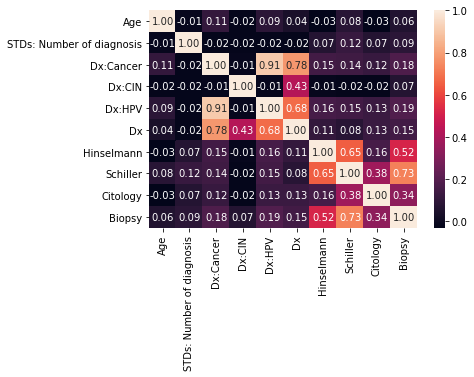

In [12]:
# Create a heatmap showing correlation between numerical variables
corr = df.corr().round(2)
ax=sns.heatmap(corr,annot=True,fmt='.2f')
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [13]:
# Let's look at how much each attribute correlate with the target value 'Schiller'
corr['Schiller'].sort_values(ascending=False)

Schiller                     1.00
Biopsy                       0.73
Hinselmann                   0.65
Citology                     0.38
Dx:HPV                       0.15
Dx:Cancer                    0.14
STDs: Number of diagnosis    0.12
Dx                           0.08
Age                          0.08
Dx:CIN                      -0.02
Name: Schiller, dtype: float64

In [14]:
# Let's look at how much each attribute correlate with the target value 'Citology'
corr['Citology'].sort_values(ascending=False)

Citology                     1.00
Schiller                     0.38
Biopsy                       0.34
Hinselmann                   0.16
Dx                           0.13
Dx:HPV                       0.13
Dx:Cancer                    0.12
STDs: Number of diagnosis    0.07
Dx:CIN                      -0.02
Age                         -0.03
Name: Citology, dtype: float64

In [15]:
# Let's look at how much each attribute correlate with the target value 'Biopsy'
corr['Biopsy'].sort_values(ascending=False)

Biopsy                       1.00
Schiller                     0.73
Hinselmann                   0.52
Citology                     0.34
Dx:HPV                       0.19
Dx:Cancer                    0.18
Dx                           0.15
STDs: Number of diagnosis    0.09
Dx:CIN                       0.07
Age                          0.06
Name: Biopsy, dtype: float64

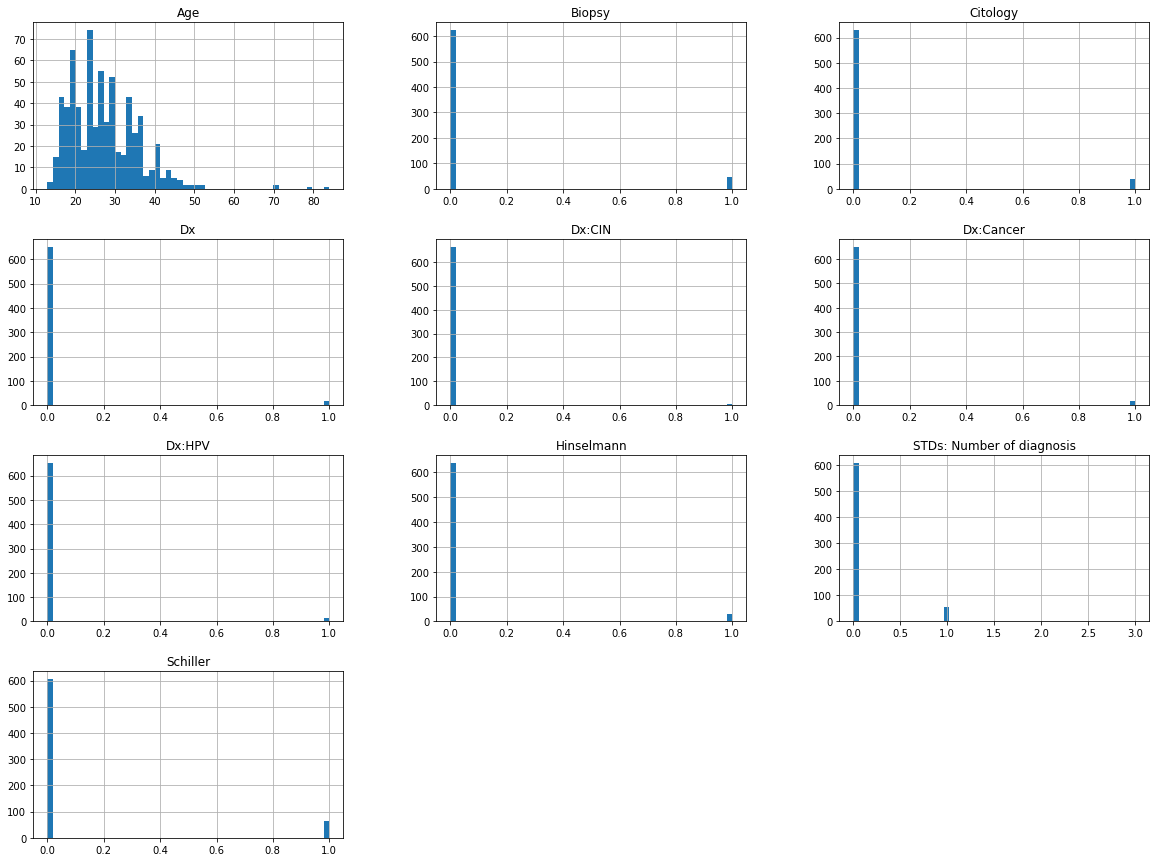

In [16]:
# Create histograms of different features
df.hist(bins=50,figsize=(20,15))
plt.show()

## Developing a classification model

One point to note for the model is that there are three target variables in the dataset. Thus the model has to be such that it works for multilabel classification.

### a) Create training and test sets

In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict,train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve,roc_curve

In [18]:
attributes=list(df.columns[:-3])
targets=list(df.columns[-3:])
data=df.astype(np.float64)

In [19]:
# Create training and test sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(data[attributes],
                                                  data[targets], test_size=0.2, random_state = 42)
X_train=np.array(X_train_df)
y_train=np.array(y_train_df)
X_test=np.array(X_test_df)
y_test=np.array(y_test_df)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((534, 31), (534, 3), (134, 31), (134, 3))

### a) K nearest neighbors classifier

Let's first try the KNeighbors classifier, since that is at least mentioned to handle multilabel classification.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#Let's create a pipeline for the model
kn_clf=Pipeline([
    ("std_scaler",StandardScaler()),
    ("name",KNeighborsClassifier())
])

In [22]:
kn_clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('name', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

Let's evaluate the model.

In [23]:
# Create the predictions with the model
y_train_knn_pred=cross_val_predict(kn_clf,X_train,y_train,cv=5)

In [24]:
# Let's look at the confusion matrix for the three target variables
for i in range(3):
    print('Target variable: ',i)
    print(confusion_matrix(y_train[:,i],y_train_knn_pred[:,i]))

Target variable:  0
[[482   2]
 [ 32  18]]
Target variable:  1
[[505   1]
 [ 28   0]]
Target variable:  2
[[493   7]
 [ 23  11]]


In [25]:
# Get the precision, recall and F1 scores for each target variable
for i in range(3):
    print('Target variable: ',i)
    print('Precision score: ',precision_score(y_train[:,i],y_train_knn_pred[:,i]))
    print('Recall score: ',recall_score(y_train[:,i],y_train_knn_pred[:,i]))
    print('F1-score: ',f1_score(y_train[:,i],y_train_knn_pred[:,i]))
    print('------------------')

Target variable:  0
Precision score:  0.9
Recall score:  0.36
F1-score:  0.5142857142857143
------------------
Target variable:  1
Precision score:  0.0
Recall score:  0.0
F1-score:  0.0
------------------
Target variable:  2
Precision score:  0.6111111111111112
Recall score:  0.3235294117647059
F1-score:  0.42307692307692313
------------------


In [26]:
# Let's compute the average score across all three target variables
# Average method is 'macro', assuming that all target variables are as important.
f1_score(y_train,y_train_knn_pred,average='macro')

0.3124542124542125

In [27]:
# The alternative for average method is 'weighted', the scores are weighted according to the number of instances with a certain target label.
f1_score(y_train,y_train_knn_pred,average='weighted')

0.3580259026687599

The score is not very good. Let's try random forest classification next.

### b) Random forest classification - with multilabel targets

In [28]:
from sklearn.ensemble import RandomForestClassifier

Let's create a separate model for each target variable.

In [29]:
# Let's create parameter grid for the grid search
param_grid=[
    {'n_estimators':[3,10,30,50],'max_features':[2,5,10,15,20,25]}
]

In [30]:
forest_clf0=RandomForestClassifier(n_estimators=10,class_weight='balanced',random_state=42)
forest_clf1=RandomForestClassifier(n_estimators=10,class_weight='balanced',random_state=42)
forest_clf2=RandomForestClassifier(n_estimators=10,class_weight='balanced',random_state=42)

In [31]:
grid_search0=GridSearchCV(forest_clf0,param_grid,cv=5,scoring='recall',return_train_score=True)
grid_search0.fit(X_train,y_train[:,0])
grid_search1=GridSearchCV(forest_clf1,param_grid,cv=5,scoring='recall',return_train_score=True)
grid_search1.fit(X_train,y_train[:,1])
grid_search2=GridSearchCV(forest_clf2,param_grid,cv=5,scoring='recall',return_train_score=True)
grid_search2.fit(X_train,y_train[:,2])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30, 50], 'max_features': [2, 5, 10, 15, 20, 25]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [32]:
# Let's look at the best parameters
print('Target 0: ',grid_search0.best_params_)
print('Target 1: ',grid_search1.best_params_)
print('Target 2: ',grid_search2.best_params_)

Target 0:  {'max_features': 5, 'n_estimators': 3}
Target 1:  {'max_features': 10, 'n_estimators': 3}
Target 2:  {'max_features': 2, 'n_estimators': 3}


In [33]:
# Then look at the scores for different parameter combinations
cvres0=grid_search0.cv_results_
cvres1=grid_search1.cv_results_
cvres2=grid_search2.cv_results_
print('Target 0:')
for mean_score,params in zip(cvres0["mean_test_score"],cvres0["params"]):
    print(mean_score,params)
print('Target 1:')
for mean_score,params in zip(cvres1["mean_test_score"],cvres1["params"]):
    print(mean_score,params)
print('Target 2:')
for mean_score,params in zip(cvres2["mean_test_score"],cvres2["params"]):
    print(mean_score,params)

Target 0:
0.48014981273408236 {'max_features': 2, 'n_estimators': 3}
0.35992509363295877 {'max_features': 2, 'n_estimators': 10}
0.29981273408239706 {'max_features': 2, 'n_estimators': 30}
0.3 {'max_features': 2, 'n_estimators': 50}
0.5602996254681647 {'max_features': 5, 'n_estimators': 3}
0.42003745318352065 {'max_features': 5, 'n_estimators': 10}
0.4400749063670412 {'max_features': 5, 'n_estimators': 30}
0.4601123595505618 {'max_features': 5, 'n_estimators': 50}
0.5202247191011236 {'max_features': 10, 'n_estimators': 3}
0.4601123595505618 {'max_features': 10, 'n_estimators': 10}
0.4601123595505618 {'max_features': 10, 'n_estimators': 30}
0.4601123595505618 {'max_features': 10, 'n_estimators': 50}
0.48014981273408236 {'max_features': 15, 'n_estimators': 3}
0.48014981273408236 {'max_features': 15, 'n_estimators': 10}
0.48014981273408236 {'max_features': 15, 'n_estimators': 30}
0.48014981273408236 {'max_features': 15, 'n_estimators': 50}
0.500187265917603 {'max_features': 20, 'n_estimat

Let's look at feature importances

In [34]:
# Then look at feature importances
print('Target: 0')
feature_importances0=grid_search0.best_estimator_.feature_importances_
sorted(zip(feature_importances0,attributes),reverse=True)

Target: 0


[(0.34496541580080287, 'Hinselmann'),
 (0.1090101235932859, 'Age'),
 (0.09229840047833436, 'Hormonal Contraceptives (years)'),
 (0.09123148413884409, 'Num of pregnancies'),
 (0.08841038036241931, 'First sexual intercourse'),
 (0.07017194311442272, 'Number of sexual partners'),
 (0.04267510141613174, 'IUD (years)'),
 (0.037753031943605075, 'Smokes'),
 (0.02509481975881291, 'Hormonal Contraceptives'),
 (0.024793828134451846, 'STDs:condylomatosis'),
 (0.017279243507887797, 'STDs: Number of diagnosis'),
 (0.016458496891643335, 'Smokes (years)'),
 (0.010777464175144184, 'STDs:vulvo-perineal condylomatosis'),
 (0.010346218019159423, 'Smokes (packs/year)'),
 (0.005820156534027507, 'Dx:Cancer'),
 (0.005311961042487796, 'Dx'),
 (0.004711781447427754, 'IUD'),
 (0.0024526644732075363, 'STDs:syphilis'),
 (0.0002827578044274439, 'STDs:vaginal condylomatosis'),
 (8.717549261320934e-05, 'STDs (number)'),
 (6.755187086311181e-05, 'STDs:genital herpes'),
 (0.0, 'STDs:pelvic inflammatory disease'),
 (0.

In [35]:
print('Target: 1')
feature_importances1=grid_search1.best_estimator_.feature_importances_
sorted(zip(feature_importances1,attributes),reverse=True)

Target: 1


[(0.21856065513167758, 'Age'),
 (0.1632530559939489, 'First sexual intercourse'),
 (0.10943815476551955, 'Hormonal Contraceptives (years)'),
 (0.10652627554832955, 'Num of pregnancies'),
 (0.08560489435932672, 'Number of sexual partners'),
 (0.0611240603281995, 'STDs: Number of diagnosis'),
 (0.05438228457104149, 'Hinselmann'),
 (0.03964053066499409, 'Dx:HPV'),
 (0.030571115850700718, 'Smokes (packs/year)'),
 (0.025019466795854744, 'Dx'),
 (0.022794807961135616, 'Hormonal Contraceptives'),
 (0.02222448238633785, 'Smokes (years)'),
 (0.01907595166144867, 'IUD'),
 (0.012962370170599674, 'STDs:condylomatosis'),
 (0.010178381685192809, 'IUD (years)'),
 (0.008770467713015291, 'Smokes'),
 (0.007627427211851386, 'STDs:HIV'),
 (0.0011645876931739728, 'Dx:CIN'),
 (0.0010810295076519028, 'STDs (number)'),
 (0.0, 'STDs:vulvo-perineal condylomatosis'),
 (0.0, 'STDs:vaginal condylomatosis'),
 (0.0, 'STDs:syphilis'),
 (0.0, 'STDs:pelvic inflammatory disease'),
 (0.0, 'STDs:molluscum contagiosum'),
 

In [36]:
print('Target: 2')
feature_importances2=grid_search2.best_estimator_.feature_importances_
sorted(zip(feature_importances2,attributes),reverse=True)

Target: 2


[(0.31330597006232036, 'Hinselmann'),
 (0.13700571317168045, 'Age'),
 (0.11377125627232576, 'Hormonal Contraceptives (years)'),
 (0.06955375981878349, 'Num of pregnancies'),
 (0.06310458835397591, 'First sexual intercourse'),
 (0.05979476847586782, 'Number of sexual partners'),
 (0.031606832404577546, 'IUD'),
 (0.031235904453629375, 'IUD (years)'),
 (0.028892912499402682, 'STDs'),
 (0.025395052336341692, 'Dx'),
 (0.024260914488418425, 'Dx:CIN'),
 (0.024166146959362728, 'STDs (number)'),
 (0.01673865866778465, 'Smokes (packs/year)'),
 (0.016331958297098978, 'STDs:genital herpes'),
 (0.01473376411550257, 'Smokes (years)'),
 (0.009813943792098838, 'Hormonal Contraceptives'),
 (0.006796175436160404, 'Dx:HPV'),
 (0.004912461213374497, 'STDs:condylomatosis'),
 (0.0028643107498465027, 'Smokes'),
 (0.0024496531182631154, 'STDs:vulvo-perineal condylomatosis'),
 (0.0017259291205431555, 'STDs: Number of diagnosis'),
 (0.001453772825688774, 'STDs:syphilis'),
 (8.555336695225122e-05, 'Dx:Cancer'),


There seem to be quite many features which have no importance to the model. Let's remove features with feature importance as 0 for target variable 1.

In [37]:
# Let's take the best models according to grid search
rf_model0=grid_search0.best_estimator_
rf_model1=grid_search1.best_estimator_
rf_model2=grid_search2.best_estimator_

In [38]:
y_train_forest_pred=np.zeros_like(y_train,dtype=float)
# Create the predictions with the models
y_train_forest_pred[:,0]=cross_val_predict(rf_model0,X_train,y_train[:,0],cv=5)
y_train_forest_pred[:,1]=cross_val_predict(rf_model1,X_train,y_train[:,1],cv=5)
y_train_forest_pred[:,2]=cross_val_predict(rf_model2,X_train,y_train[:,2],cv=5)

In [39]:
# Let's look at the confusion matrix for the three target variables
for i in range(3):
    print('Target variable: ',i)
    print(confusion_matrix(y_train[:,i],y_train_forest_pred[:,i]))

Target variable:  0
[[475   9]
 [ 22  28]]
Target variable:  1
[[492  14]
 [ 27   1]]
Target variable:  2
[[491   9]
 [ 20  14]]


In [40]:
# Get the precision, recall and F1 scores for each target variable
for i in range(3):
    print('Target variable: ',i)
    print('Precision score: ',precision_score(y_train[:,i],y_train_forest_pred[:,i]))
    print('Recall score: ',recall_score(y_train[:,i],y_train_forest_pred[:,i]))
    print('F1-score: ',f1_score(y_train[:,i],y_train_forest_pred[:,i]))
    print('------------------')

Target variable:  0
Precision score:  0.7567567567567568
Recall score:  0.56
F1-score:  0.6436781609195402
------------------
Target variable:  1
Precision score:  0.06666666666666667
Recall score:  0.03571428571428571
F1-score:  0.046511627906976744
------------------
Target variable:  2
Precision score:  0.6086956521739131
Recall score:  0.4117647058823529
F1-score:  0.4912280701754386
------------------


Let's draw precision and recall curves as a function of decision thresholds.

In [41]:
y_probas_forest=np.zeros_like(y_train,dtype=float)
# Create the scores with the models
y_probas_forest[:,0]=cross_val_predict(rf_model0,X_train,y_train[:,0],cv=5,method='predict_proba')[:,1]
y_probas_forest[:,1]=cross_val_predict(rf_model1,X_train,y_train[:,1],cv=5,method='predict_proba')[:,1]
y_probas_forest[:,2]=cross_val_predict(rf_model2,X_train,y_train[:,2],cv=5,method='predict_proba')[:,1]

In [42]:
precisions0,recalls0,thresholds0=precision_recall_curve(y_train[:,0],y_probas_forest[:,0])
precisions1,recalls1,thresholds1=precision_recall_curve(y_train[:,1],y_probas_forest[:,1])
precisions2,recalls2,thresholds2=precision_recall_curve(y_train[:,2],y_probas_forest[:,2])

In [43]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")

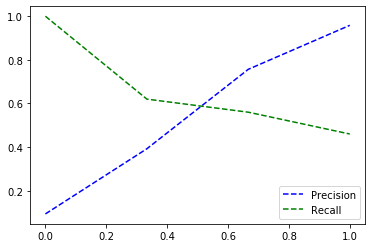

In [44]:
plot_precision_recall_vs_threshold(precisions0,recalls0,thresholds0)
plt.legend()
plt.show()

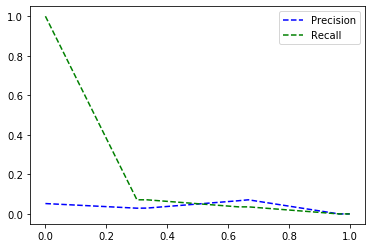

In [45]:
plot_precision_recall_vs_threshold(precisions1,recalls1,thresholds1)
plt.legend()
plt.show()

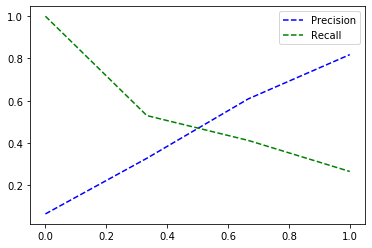

In [46]:
plot_precision_recall_vs_threshold(precisions2,recalls2,thresholds2)
plt.legend()
plt.show()

It seems that the model is performing very poorly for the target variable 1. There was quite many features which had no importance to the model. Let's remove features with feature importance as 0 for target variable 1 and see if the scores improve.

### c) Random forest classification with reduced set of features (for Target 1 variable)

Let's take only those features where feature importance <>0.0, and create a new model for target variable 1.

In [47]:
bool=feature_importances2!=0
X_train_reduced=X_train[:,bool]
X_train_reduced.shape

(534, 23)

In [48]:
# Let's create parameter grid for the grid search
param_grid=[
    {'n_estimators':[3,10,30,50],'max_features':[2,5,10,15,20]}
]

In [49]:
grid_search1=GridSearchCV(forest_clf1,param_grid,cv=5,scoring='recall',return_train_score=True)
grid_search1.fit(X_train_reduced,y_train[:,1])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30, 50], 'max_features': [2, 5, 10, 15, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [50]:
# Let's look at the best parameters
print('Target 1: ',grid_search1.best_params_)

Target 1:  {'max_features': 2, 'n_estimators': 3}


In [51]:
# Then look at feature importances
cvres1=grid_search1.cv_results_
print('Target 1:')
for mean_score,params in zip(cvres1["mean_test_score"],cvres1["params"]):
    print(mean_score,params)

Target 1:
0.03970037453183521 {'max_features': 2, 'n_estimators': 3}
0.0 {'max_features': 2, 'n_estimators': 10}
0.0 {'max_features': 2, 'n_estimators': 30}
0.0 {'max_features': 2, 'n_estimators': 50}
0.033707865168539325 {'max_features': 5, 'n_estimators': 3}
0.0 {'max_features': 5, 'n_estimators': 10}
0.0 {'max_features': 5, 'n_estimators': 30}
0.0 {'max_features': 5, 'n_estimators': 50}
0.0 {'max_features': 10, 'n_estimators': 3}
0.0 {'max_features': 10, 'n_estimators': 10}
0.0 {'max_features': 10, 'n_estimators': 30}
0.0 {'max_features': 10, 'n_estimators': 50}
0.0 {'max_features': 15, 'n_estimators': 3}
0.0 {'max_features': 15, 'n_estimators': 10}
0.0 {'max_features': 15, 'n_estimators': 30}
0.0 {'max_features': 15, 'n_estimators': 50}
0.0 {'max_features': 20, 'n_estimators': 3}
0.0 {'max_features': 20, 'n_estimators': 10}
0.0 {'max_features': 20, 'n_estimators': 30}
0.0 {'max_features': 20, 'n_estimators': 50}


The results do not seem to improve very much for target 1 variable. Let's still analyse its performance.

In [52]:
rf_model1=grid_search1.best_estimator_
y_train_forest_pred[:,1]=cross_val_predict(rf_model1,X_train_reduced,y_train[:,1],cv=5)

In [53]:
# Let's look at the confusion matrix for the target variable 1
print('Target variable: ',1)
print(confusion_matrix(y_train[:,1],y_train_forest_pred[:,1]))

Target variable:  1
[[498   8]
 [ 27   1]]


The performance did not really improve. Let's look at the precision recall curve for it.

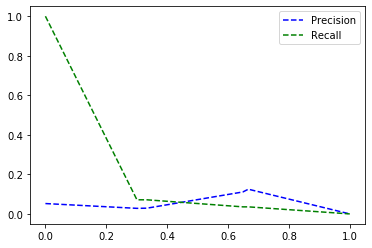

In [54]:
y_probas_forest[:,1]=cross_val_predict(rf_model1,X_train_reduced,y_train[:,1],cv=5,method='predict_proba')[:,1]
precisions1,recalls1,thresholds1=precision_recall_curve(y_train[:,1],y_probas_forest[:,1])
plot_precision_recall_vs_threshold(precisions1,recalls1,thresholds1)
plt.legend()
plt.show()

It seems that if the threshold would be lowered, the precision could be increased. However, the recall stays low for all threshold levels.

## d) ROC curves

Let's still draw ROC curves. 

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
fpr_forest0,tpr_forest0,thresholds_forest0=roc_curve(y_train[:,0],y_probas_forest[:,0])
fpr_forest2,tpr_forest2,thresholds_forest2=roc_curve(y_train[:,2],y_probas_forest[:,2])

In [57]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate (Recall)')

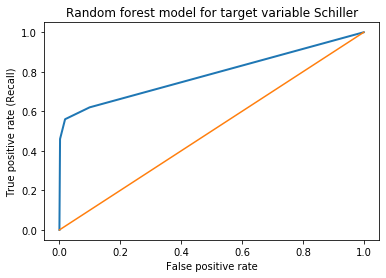

In [58]:
plot_roc_curve(fpr_forest0,tpr_forest0)
plt.title('Random forest model for target variable Schiller')
plt.show()

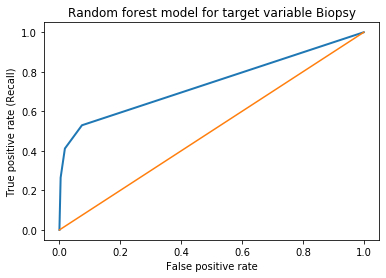

In [59]:
plot_roc_curve(fpr_forest2,tpr_forest2)
plt.title('Random forest model for target variable Biopsy')
plt.show()

# Conclusions

In this notebook , the multilabel classification problem was analysed with the help of Random Forest classifier. The conclusion was that it was best to create a separate model for each target variable. Also, the prediction of one of the target variables did not succeed with these models. Probably the dataset was too small after observations with null values were removed.